# Deer Diffusion

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


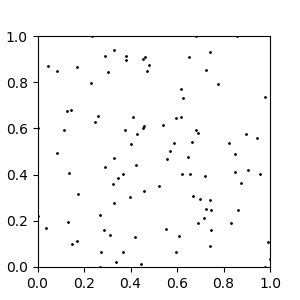

In [47]:
%matplotlib notebook

n_animals = 100
n_steps = 100
diffusion_speed = 0.03

x = np.ones(n_animals) * 0.5
y = np.ones(n_animals) * 0.5

fig = plt.figure(figsize=(3,3))
plt.xlim((0,1));
plt.ylim((0,1));
 
for t in range(n_steps):
    x += np.random.randn(n_animals)*diffusion_speed
    y += np.random.randn(n_animals)*diffusion_speed
    
    for i in range(n_animals):
        if x[i]>1:
            x[i]=1
        if x[i]<0:
            x[i]=0
        
        if y[i]>1:
            y[i]=1
        if y[i]<0:
            y[i]=0
   
    plt.cla()
    plt.plot(x,y,'k.',markersize=2);
    #time.sleep(0.01)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() #THIS MAKES IT MOVE!

## Better ways to limit values in a numpy vector

The power of numpy is that if we can write a one-liner, it will be really fast. So we should try to avoid for loops, if possible. 

For a playground situation, let's create a numpy array with only one negative element, and then let's find a way to set this element to 0. So like limiting from below in our geese-meese situation.

In [56]:
#Playground for changing stuff in a vector!

a = np.array([1,2,7,-7,4]) #Our task is to limit this -7, making it a 0. 

#Option #1, slow loop:
a = np.array([1,2,7,-7,4])
for i in range(len(a)):
    if a[i]<0: a[i] = 0
print(a)

#Option #2, numpy-style conditions aka boolean indexing (fast):
a = np.array([1,2,3,-7,4])
print('a<0:', a<7)
print('a[a < 0]:', a[a<0])  #Logical indexing #This only returns the values where the thingy in the square brackets is true. 
                            #If the length doesn't match, it will return an error.
a[a<0] = 0     #Only set values for those elements where the condition is True
print(a)

#Option #3, vectorized formula (fast):
a = np.array([1,2,3,-7,4])
a = np.maximum(a,0)   #np.max() calcs the max of all elements, np.maximum() applies max to each element
print(a)

[1 2 7 0 4]
a<0: [ True  True  True  True  True]
a[a < 0]: [-7]
[1 2 3 0 4]
[1 2 3 0 4]


In [ ]:
#Using this^, make your code faster!
#You'll still have four lines, but you'll no longer have a for loop, which means you can run for more animals

<IPython.core.display.Javascript object>


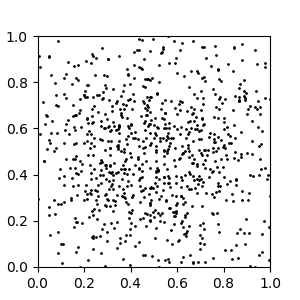

In [66]:
%matplotlib notebook

n_animals = 1000
n_steps = 100
diffusion_speed = 0.03

x = np.ones(n_animals) * 0.5
y = np.ones(n_animals) * 0.5

fig = plt.figure(figsize=(3,3))
plt.xlim((0,1));
plt.ylim((0,1));
 
for t in range(n_steps):
    x += np.random.randn(n_animals)*diffusion_speed
    y += np.random.randn(n_animals)*diffusion_speed
   
    plt.cla()
    plt.plot(x,y,'k.',markersize=2);
    #time.sleep(0.01)
    plt.xlim((0,1));
    plt.ylim((0,1));
    fig.canvas.draw() #THIS MAKES IT MOVE!
    
x = np.maximum(x,1)
x = np.minimum(x,0)
y = np.maximum(y,1)
y = np.minimum(y,0)

In [ ]:
#Homework
#Move from diffusion deer to dedicated meese????
#Instead of brownian diffusion, let's have dedicated moose
#Speed (?): Each has a vector and wants to go somewhere, and each next position will be previous position plus speed multiplied by dt (vector dirrection will be randomized)
#Then, make them reflect from the border -- reverse the speed!

<IPython.core.display.Javascript object>


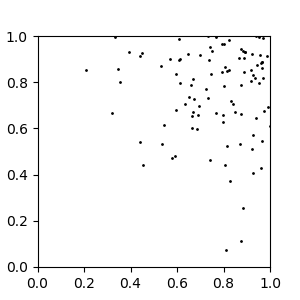

KeyboardInterrupt: 

In [78]:
%matplotlib notebook

n_animals = 100
n_steps = 50
diffusion_speed = 0.03
speed = 0.05

x = np.ones(n_animals) * 0.5
y = np.ones(n_animals) * 0.5

fig = plt.figure(figsize=(3,3))
plt.xlim((0,1));
plt.ylim((0,1));
 
for t in range(n_steps):
    x += np.random.randn(n_animals)*diffusion_speed
    y += np.random.randn(n_animals)*diffusion_speed

    for a in range(n_animals):
        
        vx = np.random.rand(n_animals)
        vy = np.random.rand(n_animals)
        x += vx * speed
        y += vy * speed
        
        x = np.where(x>0, x, vx)
        x = np.where(x<1, x, vx)
        y = np.where(y>0, y, vy)
        y = np.where(y<1, y, vy)

        plt.cla()
        plt.plot(x,y,'k.',markersize=2);
        #time.sleep(0.01)
        plt.xlim((0,1));
        plt.ylim((0,1));
        fig.canvas.draw() #THIS MAKES IT MOVE!
    
x = np.maximum(x,1)
x = np.minimum(x,0)
y = np.maximum(y,1)
y = np.minimum(y,0)